In [1]:
import pandas as pd
import numpy as np

bank = pd.read_csv('./dataset/bank.csv')
bank

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1.0,58.0,100000.0,2143.0,married,"management,tertiary",yes,no,yes,no,unknown,5.0,"may, 2017",261 sec,1.0,-1.0,0.0,unknown,no
1,2.0,44.0,60000.0,29.0,single,"technician,secondary",yes,no,yes,no,unknown,5.0,"may, 2017",151 sec,1.0,-1.0,0.0,unknown,no
2,3.0,33.0,120000.0,2.0,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5.0,"may, 2017",76 sec,1.0,-1.0,0.0,unknown,no
3,4.0,47.0,20000.0,1506.0,married,"blue-collar,unknown",no,no,yes,no,unknown,5.0,"may, 2017",92 sec,1.0,-1.0,0.0,unknown,no
4,5.0,33.0,0.0,1.0,single,"unknown,unknown",no,no,no,no,unknown,5.0,"may, 2017",198 sec,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45209,45208.0,71.0,55000.0,1729.0,divorced,"retired,primary",yes,no,no,no,cellular,17.0,"nov, 2017",7.6 min,2.0,-1.0,0.0,unknown,yes
45210,45209.0,72.0,55000.0,5715.0,married,"retired,secondary",yes,no,no,no,cellular,17.0,"nov, 2017",18.7833333333333 min,5.0,184.0,3.0,success,yes
45211,45210.0,57.0,20000.0,668.0,married,"blue-collar,secondary",yes,no,no,no,telephone,17.0,"nov, 2017",8.46666666666667 min,4.0,-1.0,0.0,unknown,no


In [2]:
bank.drop(['contact','day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response', 'targeted', 'customerid' ], axis=1, inplace=True)
# bank 데이터프레임을 복사하여 수정
bank = bank.copy()

# 'marital' 열의 'divorced' 값을 'single'로 대체

# 결측치가 있는 행 삭제
bank = bank.dropna()

# 'jobedu' 열을 ','를 기준으로 나누어 'job'과 'class' 열 생성
bank[['job', 'class']] = bank['jobedu'].str.split(',', expand=True)

# 'jobedu' 열 삭제
bank.drop(columns=['jobedu'], inplace=True)

# 'job' 열 값 변경
job_mapping = {'blue-collar': 'blue', 'technician': 'blue', 'management': 'white', 'admin.': 'white', 'entrepreneur': 'white', 'self-employed': 'white', 'retired': 'no', 'services': 'pink', 'unemployed': 'no', 'housemaid': 'no', 'student': 'no'}
bank['job'].replace(job_mapping, inplace=True)

# 'class' 열이 'unknown'인 행 제거 / unknown 1857 / 약 4%
bank = bank[bank['class'] != 'unknown']

# 'job' 열이 'unknown'인 행 제거 / unknown 288개
bank = bank[bank['job'] != 'unknown']

bank['housing'] = bank.pop('housing')
bank = bank.copy()
bank

,age,salary,balance,marital,default,loan,job,class,housing
0,58.0,100000.0,2143.0,married,no,no,white,tertiary,yes
1,44.0,60000.0,29.0,single,no,no,blue,secondary,yes
2,33.0,120000.0,2.0,married,no,yes,white,secondary,yes
5,35.0,100000.0,231.0,married,no,no,white,tertiary,yes
6,28.0,100000.0,447.0,single,no,yes,white,tertiary,yes
...,...,...,...,...,...,...,...,...,...
45206,51.0,60000.0,825.0,married,no,no,blue,tertiary,no
45209,71.0,55000.0,1729.0,divorced,no,no,no,primary,no
45210,72.0,55000.0,5715.0,married,no,no,no,secondary,no
45211,57.0,20000.0,668.0,married,no,no,blue,secondary,no


In [3]:
# na_to_k_df = bank.loc[:, 'salary'].reset_index()
# na_to_k_df
# from sklearn.preprocessing import StandardScaler

# std = StandardScaler()
# drug_std = std.fit_transform(na_to_k_df[['salary']])
# na_to_k_df['salary'] = drug_std
# na_to_k_df
# a = na_to_k_df['salary'] >= -1.96
# b = na_to_k_df['salary'] <= 1.96
# filtered_df = na_to_k_df[cond]
# filtered_df.sum()


In [4]:
from sklearn.preprocessing import LabelEncoder

marital_encoder = LabelEncoder()
targets = marital_encoder.fit_transform(bank['marital'].tolist())
bank['marital'] = targets

default_encoder = LabelEncoder()
targets = default_encoder.fit_transform(bank['default'].tolist())
bank['default'] = targets

loan_encoder = LabelEncoder()
targets = loan_encoder.fit_transform(bank['loan'].tolist())
bank['loan'] = targets

job_encoder = LabelEncoder()
targets = job_encoder.fit_transform(bank['job'].tolist())
bank['job'] = targets

class_encoder = LabelEncoder()
targets = class_encoder.fit_transform(bank['class'].tolist())
bank['class'] = targets

housing_encoder = LabelEncoder()
targets = housing_encoder.fit_transform(bank['housing'].tolist())
bank['housing'] = targets
bank

,age,salary,balance,marital,default,loan,job,class,housing
0,58.0,100000.0,2143.0,1,0,0,3,2,1
1,44.0,60000.0,29.0,2,0,0,0,1,1
2,33.0,120000.0,2.0,1,0,1,3,1,1
5,35.0,100000.0,231.0,1,0,0,3,2,1
6,28.0,100000.0,447.0,2,0,1,3,2,1
...,...,...,...,...,...,...,...,...,...
45206,51.0,60000.0,825.0,1,0,0,0,2,0
45209,71.0,55000.0,1729.0,0,0,0,1,0,0
45210,72.0,55000.0,5715.0,1,0,0,1,1,0
45211,57.0,20000.0,668.0,1,0,0,0,1,0


<Figure size 1200x1000 with 0 Axes>

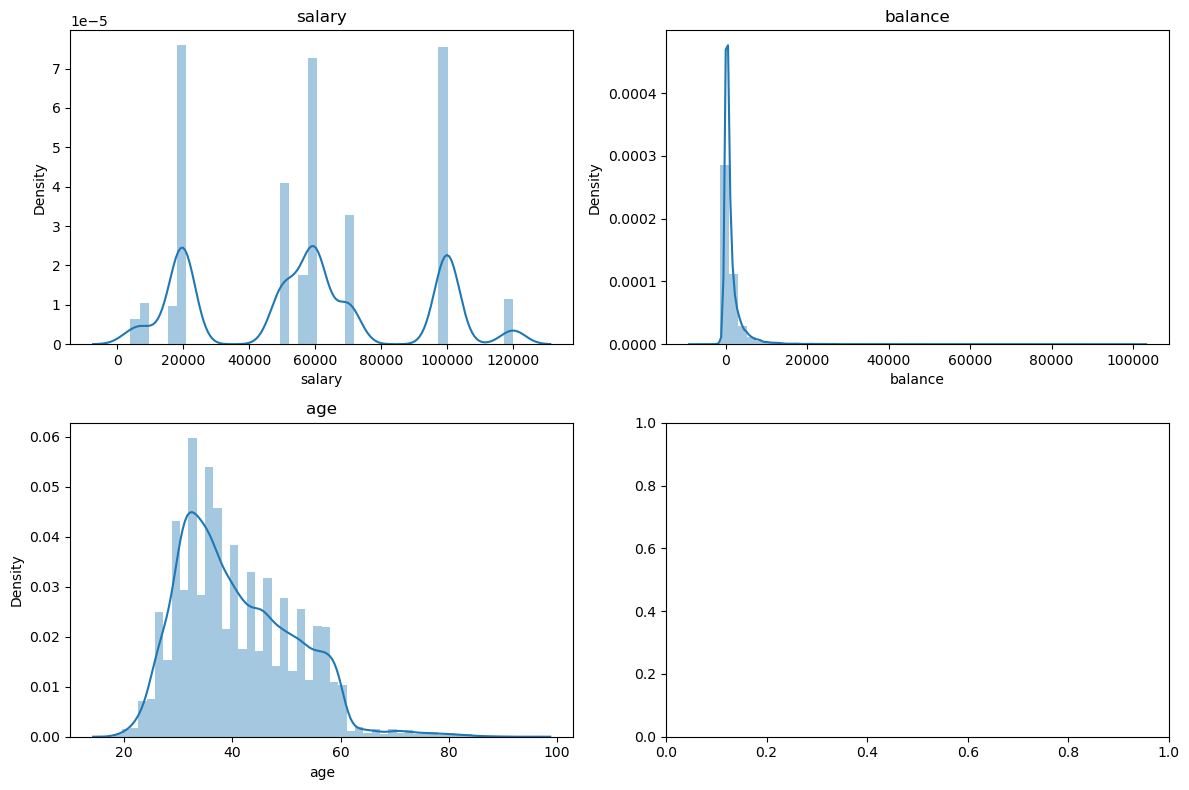

In [60]:
# 데이터 탐색 (각 컬럼에 대하여 특이사항이 육안으로 보이는 지 시각화)
# 시각화를 통한 데이터 탐색
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.distplot(bank['salary'], kde=True,ax=axes[0,0])
axes[0,0].set_title('salary')

sns.distplot(bank['balance'], kde=True,ax=axes[0,1])
axes[0,1].set_title('balance')

sns.distplot(bank['age'], kde=True,ax=axes[1,0])
axes[1,0].set_title('age')


bank['marital'].value_counts
bank['default'].value_counts
bank['loan'].value_counts
bank['job'].value_counts
bank['class'].value_counts
bank['housing'].value_counts
    
plt.tight_layout()
plt.show()


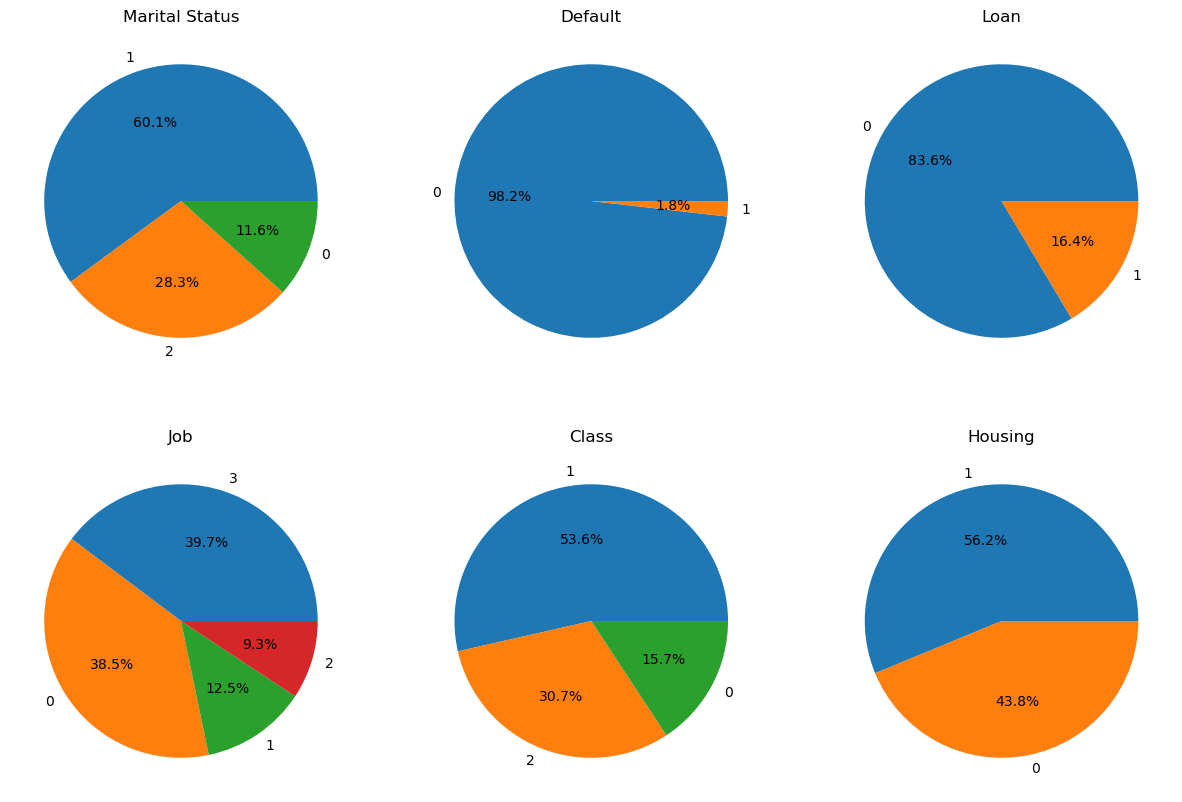

In [61]:
import matplotlib.pyplot as plt

# 데이터
marital_counts = bank['marital'].value_counts()
default_counts = bank['default'].value_counts()
loan_counts = bank['loan'].value_counts()
job_counts = bank['job'].value_counts()
class_counts = bank['class'].value_counts()
housing_counts = bank['housing'].value_counts()

# 파이그래프 그리기
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# 결혼 여부
axs[0, 0].pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%')
axs[0, 0].set_title('Marital Status')

# 채무 불이행 여부
axs[0, 1].pie(default_counts, labels=default_counts.index, autopct='%1.1f%%')
axs[0, 1].set_title('Default')

# 대출 여부
axs[0, 2].pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%')
axs[0, 2].set_title('Loan')

# 직업
axs[1, 0].pie(job_counts, labels=job_counts.index, autopct='%1.1f%%')
axs[1, 0].set_title('Job')

# 클래스
axs[1, 1].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
axs[1, 1].set_title('Class')

# 주택 대출 여부
axs[1, 2].pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%')
axs[1, 2].set_title('Housing')

plt.show()


In [5]:
import pandas as pd

# 데이터프레임 생성 예시
data = {'marital': ['married', 'single', 'married']}
df = pd.DataFrame(data)

# 원핫인코딩 적용
df_encoded = pd.get_dummies(df, columns=['marital'])

print(df_encoded)


   marital_married  marital_single
0             True           False
1            False            True
2             True           False


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier()

features, targets = bank.iloc[:, :-1], bank.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dtc.fit(X_train.values, y_train.values)

DecisionTreeClassifier()

In [7]:
from sklearn.tree import export_graphviz

export_graphviz(
    dtc, 
    out_file='./images/ddd.dot', 
    class_names=housing_encoder.classes_, 
    feature_names=features.columns, 
    impurity=True, 
    filled=True
)

In [8]:
import graphviz

with open('./images/ddd.dot') as f:
    ddd = f.read()

drug_dtc01_graph = graphviz.Source(ddd)

In [9]:
# drug_dtc01_graph.render(filename='ddd', directory='./images', format='png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.084091 to fit


'images\\ddd.png'

<img src="./images/ddd.png">

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

features, targets = bank.iloc[:, :-1], bank.iloc[:, -1]

# stratify: 데이터 분리 시 타겟 데이터의 분포 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': [ 11,12,15,18,21], 'min_samples_split': [300,400,450,500,550,600,700,]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=10, refit=True, return_train_score=True)



# 교차 검증 진행
g_dtc.fit(X_train, y_train)
pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 11, 'min_samples_split': 300}",0.641091,26,0.646786,0.646786,0.634337
1,"{'max_depth': 11, 'min_samples_split': 400}",0.642741,8,0.648523,0.645628,0.636074
2,"{'max_depth': 11, 'min_samples_split': 450}",0.643783,2,0.649682,0.646786,0.637232
3,"{'max_depth': 11, 'min_samples_split': 500}",0.643725,4,0.649392,0.645918,0.636943
4,"{'max_depth': 11, 'min_samples_split': 550}",0.643175,6,0.644470,0.649392,0.639259
5,"{'max_depth': 11, 'min_samples_split': 600}",0.642625,11,0.644470,0.648523,0.638680
6,"{'max_depth': 11, 'min_samples_split': 700}",0.641930,19,0.646786,0.649102,0.638390
7,"{'max_depth': 12, 'min_samples_split': 300}",0.640627,29,0.647365,0.641285,0.634627
8,"{'max_depth': 12, 'min_samples_split': 400}",0.642364,13,0.649392,0.640127,0.636074
9,"{'max_depth': 12, 'min_samples_split': 450}",0.643783,3,0.650840,0.641575,0.637232


In [11]:
print("Best parameters:", g_dtc.best_params_)

Best parameters: {'max_depth': 12, 'min_samples_split': 500}


In [69]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 64.0996%


In [13]:
from sklearn.tree import export_graphviz

export_graphviz(
    dtc, 
    out_file='./images/ccc.dot', 
    class_names=housing_encoder.classes_, 
    feature_names=features.columns, 
    impurity=True, 
    filled=True
)
import graphviz

with open('./images/ccc.dot') as f:
    ccc = f.read()

drug_dtc01_graph = graphviz.Source(ccc)
drug_dtc01_graph.render(filename='ccc', directory='./images', format='png')

<!-- <img src="./images/ccc.png"> -->

<img src='./images/ccc.png'>

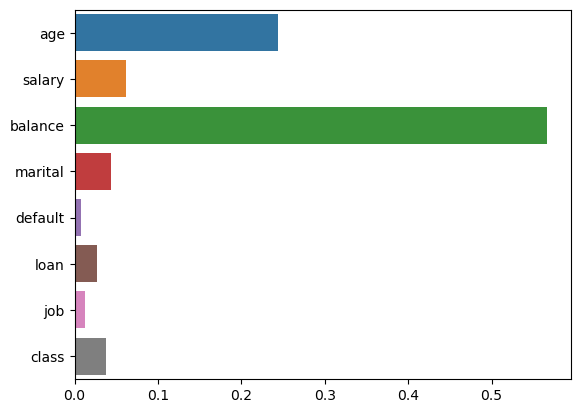

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

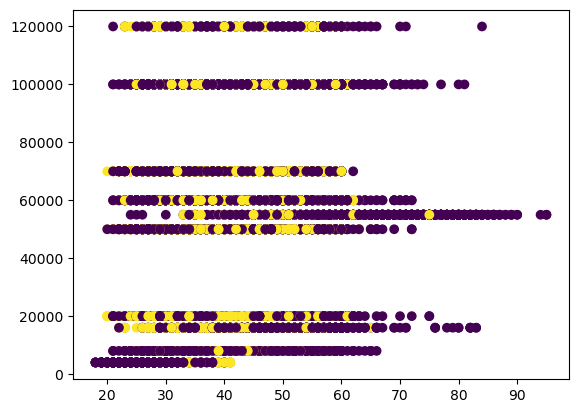

In [40]:
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=targets)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


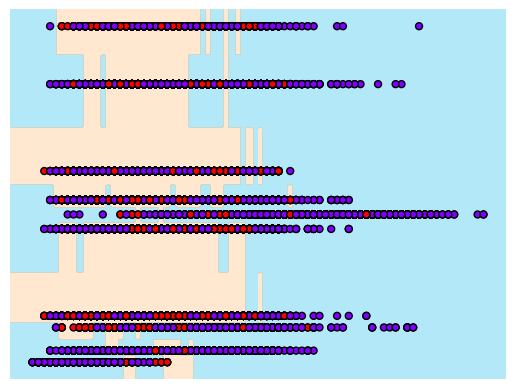

In [42]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

features_2_4 = features.iloc[:, [0, 1]]
visualize_boundary(dtc, features_2_4, targets)

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[1775 2004]
 [1096 3760]]
정확도: 0.6410, 정밀도: 0.6523, 재현율: 0.7743, F1: 0.7081, ROC-AUC: 0.6220
################################################################################


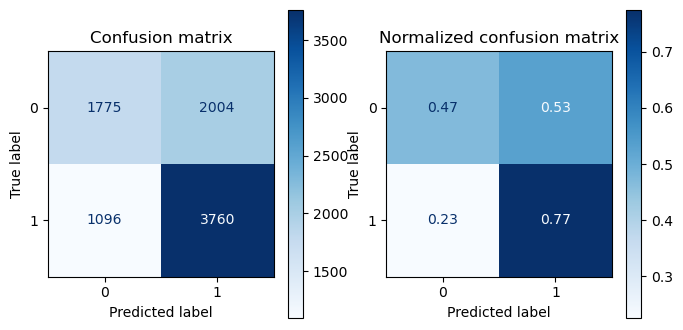

In [70]:
import matplotlib.pyplot as plt

get_evaluation(y_test, prediction, dtc, X_test)


- 양성(Positive): 고객이 집을 보유하고있음
- 음성(Negative): 고객이 집을 보유하고 있지 않음

> True Positive (TP): 고객이 집이있다고 예측했는데 진짜로 있는경우  
False Positive (FP): 고객이 집이 없는데 집이 있다고 분류한 경우.(오류, error I).    
True Negative (TN): 고객이 집이 없다고 예측했는데 정말로 없는경우  
False Negative (FN): 고객이 집이 없는데 있다고 분류한 경우(놓침, error II).    

> 정밀도 (Precision): 고객이 집이 있다고 분류한 고객 중에서 실제로 집이있는 비율을 나타낸다. 즉, 양성 클래스로 예측한 결과 중 얼마나 많은 것이 진짜 양성인지 측정한다.  
재현율 (Recall): 실제 집이있는 고객 중에서 고객이 집이있는 고객으로 정확하게 예측한 고객의 비율을 나타낸다. 즉, 모델이 얼마나 많은 집이있는 고객을 "놓치지 않고" 감지했는지 측정한다.  

> 🏆임계치를 높여서 정밀도를 높여주는 것이 적합하다. 즉 집이 없지만 있다고 하는 비율을 줄여 집이 없는 사람들을 명확하게 구분해야한다.

In [19]:
proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

for proba, predict in zip(proba.tolist(), prediction.tolist()):
    print(proba, predict)

[0.4847101780009128, 0.5152898219990871] 1
[0.7135549872122762, 0.2864450127877238] 0
[0.3076923076923077, 0.6923076923076923] 1
[0.4094432699083862, 0.5905567300916138] 1
[0.28205128205128205, 0.717948717948718] 1
[0.25874125874125875, 0.7412587412587412] 1
[0.9919517102615694, 0.008048289738430584] 0
[0.4094432699083862, 0.5905567300916138] 1
[0.32295081967213113, 0.6770491803278689] 1
[0.25589622641509435, 0.7441037735849056] 1
[0.5526992287917738, 0.4473007712082262] 0
[0.5545536519386834, 0.4454463480613165] 0
[0.22727272727272727, 0.7727272727272727] 1
[0.33810375670840787, 0.6618962432915921] 1
[0.128500823723229, 0.871499176276771] 1
[0.25589622641509435, 0.7441037735849056] 1
[0.5545536519386834, 0.4454463480613165] 0
[0.4066666666666667, 0.5933333333333334] 1
[0.3945578231292517, 0.6054421768707483] 1
[0.44529540481400437, 0.5547045951859956] 1
[0.6456456456456456, 0.35435435435435436] 0
[0.25589622641509435, 0.7441037735849056] 1
[0.128500823723229, 0.871499176276771] 1
[0.6

In [72]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

In [73]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[1775 2004]
 [1096 3760]]
정확도: 0.6410, 정밀도: 0.6523, 재현율: 0.7743, F1: 0.7081, ROC-AUC: 0.6220
################################################################################


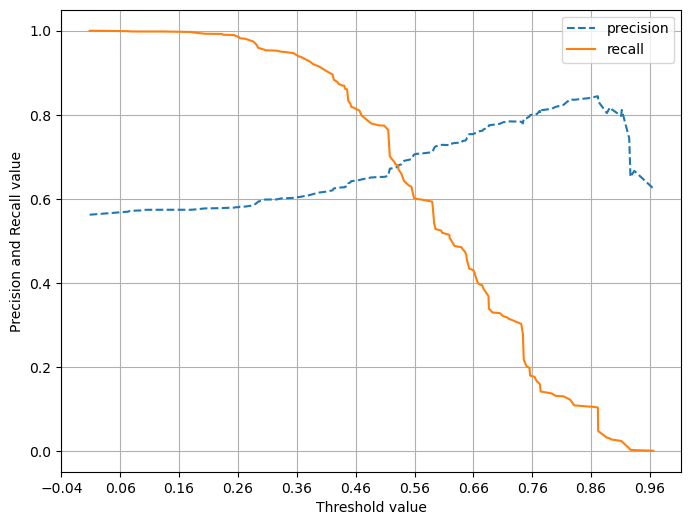

In [22]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))


In [23]:
proba_class1 = dtc.predict_proba(X_test)[:, 1].reshape(-1, 1)
_, _, thresholds = precision_recall_curve(y_test, proba_class1)
thresholds

array([0.00804829, 0.07317073, 0.07692308, 0.0952381 , 0.1       ,
       0.13333333, 0.16666667, 0.17910448, 0.18181818, 0.18237082,
       0.20408163, 0.23287671, 0.234375  , 0.25362319, 0.25641026,
       0.26168224, 0.26315789, 0.27252747, 0.28644501, 0.29147982,
       0.29441624, 0.30555556, 0.30645161, 0.32579186, 0.33333333,
       0.33879781, 0.35435435, 0.36363636, 0.36575875, 0.38138138,
       0.38832487, 0.39810427, 0.4088785 , 0.42068966, 0.42288557,
       0.42857143, 0.43037975, 0.43103448, 0.4375    , 0.44061303,
       0.44186047, 0.44544635, 0.44730077, 0.45112782, 0.45205479,
       0.46620047, 0.47029703, 0.4863388 , 0.5       , 0.50840336,
       0.51528982, 0.51785714, 0.5188172 , 0.5256917 , 0.52777778,
       0.53220339, 0.53250774, 0.53773585, 0.54216867, 0.55      ,
       0.5547046 , 0.55905512, 0.56410256, 0.57003257, 0.58986175,
       0.59055673, 0.59333333, 0.59550562, 0.60544218, 0.60666667,
       0.61923077, 0.61958266, 0.62790698, 0.64      , 0.64159

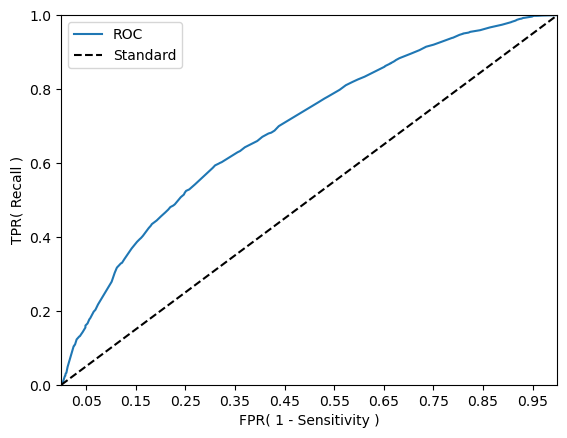

In [24]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, dtc.predict_proba(X_test)[:, 1].reshape(-1, 1))

In [25]:
_, _, thresholds = roc_curve(y_test, proba_class1)

In [1]:
thresholds = [0.00804829, 0.07317073, 0.07692308, 0.0952381 , 0.1       ,
       0.17910448, 0.18181818, 0.18237082, 0.20408163, 0.23287671,
       0.234375  , 0.25362319, 0.25641026, 0.26168224, 0.26315789,
       0.27252747, 0.28644501, 0.29147982, 0.29441624, 0.30555556,
       0.30645161, 0.32579186, 0.33879781, 0.35435435, 0.36363636,
       0.38138138, 0.38530466, 0.38832487, 0.4088785 , 0.41860465,
       0.42322097, 0.43037975, 0.43103448, 0.4375    , 0.44061303,
       0.44186047, 0.44730077, 0.45112782, 0.45205479, 0.45991561,
       0.46620047, 0.4863388 , 0.5       , 0.50840336, 0.50901526,
       0.51441153, 0.5188172 , 0.5256917 , 0.52772467, 0.52777778,
       0.53250774, 0.53773585, 0.55      , 0.55686695, 0.57003257,
       0.58986175, 0.59121775, 0.59333333, 0.59550562, 0.60666667,
       0.61818182, 0.61923077, 0.62790698, 0.64159292, 0.64596273,
       0.64872521, 0.65102639, 0.65263158, 0.66009852, 0.67510549,
       0.67705736, 0.67982924, 0.69230769, 0.70065789, 0.70481928,
       0.73072061, 0.73458904, 0.73823884, 0.75      , 0.75464684,
       0.75524476, 0.75641026, 0.76785714, 0.77333333, 0.77419355,
       0.79289941, 0.82432432, 0.86111111, 0.87035688, 0.8719346 ,
       0.89361702, 0.91211401, 0.93333333, 0.96551724]

def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

get_evaluation_by_thresholds(y_test, proba[:, 1].reshape(-1, 1), thresholds)

NameError: name 'y_test' is not defined

In [27]:
get_evaluation_by_thresholds(y_test, proba_class1, thresholds)

0.00804829
오차 행렬
[[ 113 3666]
 [   5 4851]]
정확도: 0.5749, 정밀도: 0.5696, 재현율: 0.9990, F1: 0.7255, ROC-AUC: 0.5144
################################################################################
0.07317073
오차 행렬
[[ 113 3666]
 [   5 4851]]
정확도: 0.5749, 정밀도: 0.5696, 재현율: 0.9990, F1: 0.7255, ROC-AUC: 0.5144
################################################################################
0.07692308
오차 행렬
[[ 161 3618]
 [   9 4847]]
정확도: 0.5800, 정밀도: 0.5726, 재현율: 0.9981, F1: 0.7277, ROC-AUC: 0.5204
################################################################################
0.0952381
오차 행렬
[[ 182 3597]
 [   9 4847]]
정확도: 0.5824, 정밀도: 0.5740, 재현율: 0.9981, F1: 0.7289, ROC-AUC: 0.5232
################################################################################
0.1
오차 행렬
[[ 184 3595]
 [   9 4847]]
정확도: 0.5826, 정밀도: 0.5742, 재현율: 0.9981, F1: 0.7290, ROC-AUC: 0.5234
################################################################################
0.17910448
오차 행렬
[[ 192 3587]
 [  16 4840]]
정확도:

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation_by_custom_proba(y_test, prediction, visualize=False):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if visualize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_predictions(y_test, prediction, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[1775 2004]
 [1096 3760]]
정확도: 0.6410, 정밀도: 0.6523, 재현율: 0.7743, F1: 0.7081, ROC-AUC: 0.6220
################################################################################


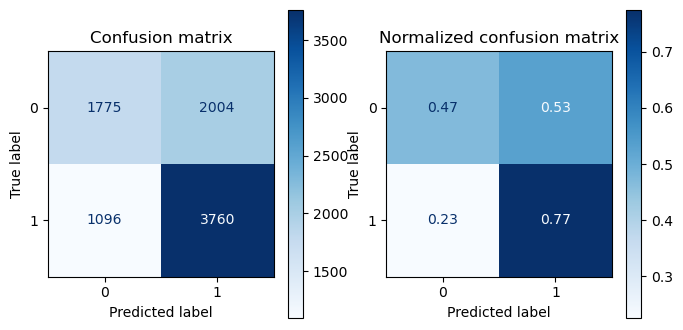

In [29]:
get_evaluation_by_custom_proba(y_test,prediction,visualize=True  )

################################################################################   
0.58986175  
오차 행렬   
[[2608 1171]  
 [1974 2882]]  
정확도: 0.6358, 정밀도: 0.7111, 재현율: 0.5935, F1: 0.6470, ROC-AUC: 0.6418   
################################################################################  
0.59121775  
오차 행렬  
[[2762 1017]   
 [2225 2631]]  
정확도: 0.6246, 정밀도: 0.7212, 재현율: 0.5418, F1: 0.6188, ROC-AUC: 0.6363 
################################################################################  

오차 행렬
[[2608 1171]
 [1974 2882]]
정확도: 0.6358, 정밀도: 0.7111, 재현율: 0.5935, F1: 0.6470, ROC-AUC: 0.6418
################################################################################


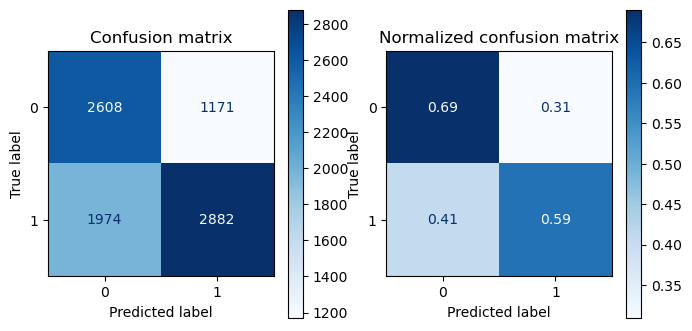

In [77]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=0.58986175).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation_by_custom_proba(y_test, custom_prediction, visualize=True)

In [31]:
bank['housing'].value_counts()

housing
1    24279
0    18894
Name: count, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE

# SMOTE 객체 생성
smote = SMOTE()

# SMOTE를 사용한 오버샘플링 적용
X_train, y_train = smote.fit_resample(X_train, y_train)


In [33]:
g_dtc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [11, 12, 15, 18, 21],
                         'min_samples_split': [300, 400, 450, 500, 550, 600,
                                               700]},
             return_train_score=True)

In [34]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 62.6636%


In [35]:
proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

for proba, predict in zip(proba.tolist(), prediction.tolist()):
    print(proba, predict)

[0.52, 0.48] 0
[0.7570498915401301, 0.24295010845986983] 0
[0.4107142857142857, 0.5892857142857143] 1
[0.5106382978723404, 0.48936170212765956] 0
[0.4588235294117647, 0.5411764705882353] 1
[0.23486682808716708, 0.7651331719128329] 1
[0.996268656716418, 0.0037313432835820895] 0
[0.5106382978723404, 0.48936170212765956] 0
[0.23636363636363636, 0.7636363636363637] 1
[0.29457364341085274, 0.7054263565891473] 1
[0.6370023419203747, 0.3629976580796253] 0
[0.5612648221343873, 0.43873517786561267] 0
[0.17757009345794392, 0.822429906542056] 1
[0.2310126582278481, 0.7689873417721519] 1
[0.15417558886509636, 0.8458244111349036] 1
[0.3237410071942446, 0.6762589928057554] 1
[0.1111111111111111, 0.8888888888888888] 1
[0.42452830188679247, 0.5754716981132075] 1
[0.33455210237659966, 0.6654478976234004] 1
[0.43457943925233644, 0.5654205607476636] 1
[0.6835820895522388, 0.3164179104477612] 0
[0.453125, 0.546875] 1
[0.24125874125874125, 0.7587412587412588] 1
[0.6351606805293005, 0.3648393194706994] 0
[0

In [36]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = dtc.predict_proba(X_test)
prediction = dtc.predict(X_test)

In [46]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

오차 행렬
[[2407 1372]
 [1852 3004]]
정확도: 0.6266, 정밀도: 0.6865, 재현율: 0.6186, F1: 0.6508, ROC-AUC: 0.6278
################################################################################
